In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import pydicom

In [3]:
import os
import glob
def get_file_list(path: str, wild: str = None) -> list:
    ret_list = []
    if not path.endswith('/'):
        path = path + '/'
    
    if wild:
        for filename in glob.glob(path + wild):
            ret_list.append(filename)
    else:
        for filename in os.listdir(path):
            ret_list.append(filename)
    
    return ret_list

In [4]:
#filelist = get_file_list("./", "*.dcm")
filelist = get_file_list("/slurm_storage/mbopf/data/PedTB/renamed/", "*.dcm")
filelist

['/slurm_storage/mbopf/data/PedTB/renamed/N0377701-AP.dcm',
 '/slurm_storage/mbopf/data/PedTB/renamed/N0377712-AP.dcm',
 '/slurm_storage/mbopf/data/PedTB/renamed/N0377724-AP.dcm',
 '/slurm_storage/mbopf/data/PedTB/renamed/N0377736-AP.dcm',
 '/slurm_storage/mbopf/data/PedTB/renamed/N0377748-AP.dcm',
 '/slurm_storage/mbopf/data/PedTB/renamed/N0377772-AP.dcm',
 '/slurm_storage/mbopf/data/PedTB/renamed/N0377784-AP.dcm',
 '/slurm_storage/mbopf/data/PedTB/renamed/N0377808-AP.dcm',
 '/slurm_storage/mbopf/data/PedTB/renamed/N0377820-AP.dcm',
 '/slurm_storage/mbopf/data/PedTB/renamed/N0377832-AP.dcm',
 '/slurm_storage/mbopf/data/PedTB/renamed/N0377844-AP.dcm',
 '/slurm_storage/mbopf/data/PedTB/renamed/N0377856-AP.dcm',
 '/slurm_storage/mbopf/data/PedTB/renamed/N0377868-AP.dcm',
 '/slurm_storage/mbopf/data/PedTB/renamed/N0377880-AP.dcm',
 '/slurm_storage/mbopf/data/PedTB/renamed/N0377892-AP.dcm',
 '/slurm_storage/mbopf/data/PedTB/renamed/N0377904-AP.dcm',
 '/slurm_storage/mbopf/data/PedTB/rename

In [6]:
for file in filelist:
    ds = pydicom.read_file(file)
    try:
        if ds.PixelRepresentation == 1:
            print(f'{os.path.basename(file)}: ds.PixelRepresentation: {ds.PixelRepresentation}')
    except AttributeError as ae_err:
        print(ae_err)
        ds.PixelRepresentation = 0
        parts = os.path.splitext(file)
        new_file = parts[0] + "_mod" + parts[1]
        if not os.path.exists(new_file):
            ds.save_as(new_file)
            print(f'Modified file: {new_file}')
        else:
            print(f'{new_file} already file exists')

'FileDataset' object has no attribute 'PixelRepresentation'
/slurm_storage/mbopf/data/PedTB/renamed/0522100-AP_mod.dcm already file exists
'FileDataset' object has no attribute 'PixelRepresentation'
/slurm_storage/mbopf/data/PedTB/renamed/0522100-LAT_mod.dcm already file exists
'FileDataset' object has no attribute 'PixelRepresentation'
/slurm_storage/mbopf/data/PedTB/renamed/0522112-AP_mod.dcm already file exists
'FileDataset' object has no attribute 'PixelRepresentation'
/slurm_storage/mbopf/data/PedTB/renamed/0522112-LAT_mod.dcm already file exists
'FileDataset' object has no attribute 'PixelRepresentation'
/slurm_storage/mbopf/data/PedTB/renamed/0522124-AP_mod.dcm already file exists
'FileDataset' object has no attribute 'PixelRepresentation'
/slurm_storage/mbopf/data/PedTB/renamed/0522124-LAT_mod.dcm already file exists
'FileDataset' object has no attribute 'PixelRepresentation'
/slurm_storage/mbopf/data/PedTB/renamed/0522184-AP_mod.dcm already file exists
'FileDataset' object has

/users/mbopf/miniconda3/envs/imaging/lib/python3.9/site-packages/pydicom/charset.py:743: UserWarning: Incorrect value for Specific Character Set 'ISO IR 192' - assuming 'ISO_IR 192'
  _warn_about_invalid_encoding(encoding, patched)
/users/mbopf/miniconda3/envs/imaging/lib/python3.9/site-packages/pydicom/charset.py:714: UserWarning: Value 'GB18030' for Specific Character Set does not allow code extensions, ignoring: ISO IR 192
  py_encodings = _handle_illegal_standalone_encodings(


In [14]:
filelist = get_file_list("/slurm_storage/mbopf/data/PedTB/renamed/", "052*.dcm")
for file in filelist:
    ds = pydicom.read_file(file, force=True)
    base = os.path.basename(file)
    if 'PixelRepresentation' not in ds:
        print(f"File {base} does not contain PixelRepresentation")
    else:
        print(f"{base} PixelRepresentation = {ds.PixelRepresentation}")
    

File 0522100-AP.dcm does not contain PixelRepresentation
File 0522100-LAT.dcm does not contain PixelRepresentation
File 0522112-AP.dcm does not contain PixelRepresentation
File 0522112-LAT.dcm does not contain PixelRepresentation
File 0522124-AP.dcm does not contain PixelRepresentation
File 0522124-LAT.dcm does not contain PixelRepresentation
File 0522184-AP.dcm does not contain PixelRepresentation
File 0522184-LAT.dcm does not contain PixelRepresentation
0522196-AP.dcm PixelRepresentation = 0
0522196-LAT.dcm PixelRepresentation = 0
0522208-AP.dcm PixelRepresentation = 0
0522208-LAT.dcm PixelRepresentation = 0
File 0522220-AP.dcm does not contain PixelRepresentation
File 0522220-LAT.dcm does not contain PixelRepresentation
0522232-AP.dcm PixelRepresentation = 0
0522232-LAT.dcm PixelRepresentation = 0
0522244-AP.dcm PixelRepresentation = 0
0522244-LAT.dcm PixelRepresentation = 0
0522256-AP.dcm PixelRepresentation = 0
0522256-LAT.dcm PixelRepresentation = 0
0522268-AP.dcm PixelRepresenta

In [10]:

filename = input("Enter image name: ")
fieldname = input("Enter field to change: ")
changed_value = input("Enter new field value: ")
print(f'{filename}; {fieldname}; {changed_value}')
ds = pydicom.read_file(filename, force=True)
print(ds.PhotometricInterpretation)
print(ds['PhotometricInterpretation'])
print(ds[fieldname])

#ds[fieldname] = changed_value
#ds.PhotometricInterpretation = changed_value
ds.PhotometricInterpretation = "MONOCHROME2"
ds.save_as("rtplan2.dcm")

Enter image name: 0221428AP.dcm
Enter field to change: PhotometricInterpretation
Enter new field value: sdf
0221428AP.dcm; PhotometricInterpretation; sdf
MONOCHROME1
(0028, 0004) Photometric Interpretation          CS: 'MONOCHROME1'
(0028, 0004) Photometric Interpretation          CS: 'MONOCHROME1'


Enter full image directory path: /slurm_storage/mbopf/data/PedTB/renamed
Enter glob string: 11*.dcm
11*.dcm
MONOCHROME1
/slurm_storage/mbopf/data/PedTB/renamed/1115692-AP.dcm
MONOCHROME1
/slurm_storage/mbopf/data/PedTB/renamed/1115501-AP.dcm
MONOCHROME1
/slurm_storage/mbopf/data/PedTB/renamed/1115501-LAT.dcm
MONOCHROME1
/slurm_storage/mbopf/data/PedTB/renamed/1115509-AP.dcm


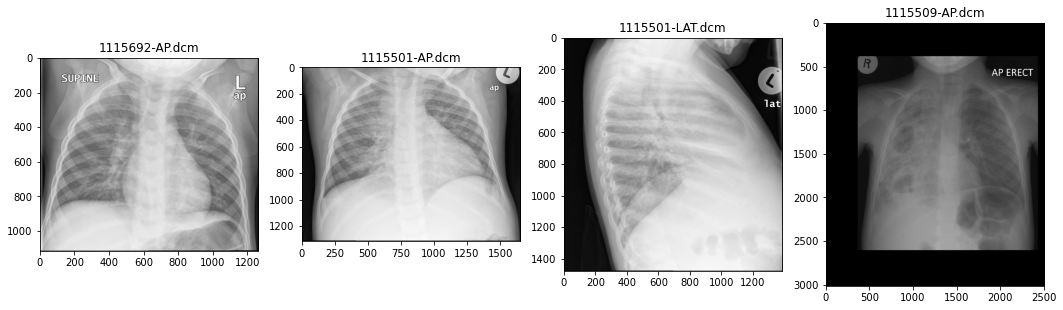

In [8]:
from pydicom.pixel_data_handlers import convert_color_space
filepath = input("Enter full image directory path: ")
glob_str = input("Enter glob string: ")
print(glob_str)
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(18,8))
filelist = get_file_list(filepath, glob_str)
for ax, file in zip(axs.ravel(), filelist):
    ds = pydicom.read_file(file, force=True)
    print(ds.PhotometricInterpretation)
    print(file)
    pixel_array = ds.pixel_array 
    basename = os.path.basename(file)
    ax.set_title(basename)
    if ds.PhotometricInterpretation == 'MONOCHROME1':
#        ax.imshow(pixel_array, cmap='gray_r')
        ax.imshow(pixel_array, cmap=plt.cm.gray_r)
    elif ds.PhotometricInterpretation == 'YBR_FULL_422':
        rgb = convert_color_space(pixel_array, "YBR_FULL_422", "RGB")
        ax.imshow(rgb)
    else:
        ax.imshow(pixel_array, cmap=plt.cm.bone)
        
plt.show()
